# Basic config

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

import pickle

%matplotlib inline

In [ ]:
DATA_PATH = "/content/drive/MyDrive/proyecto_kagggle_presion/"

df_train = pd.read_csv(DATA_PATH + 'train.csv')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# Gráficos

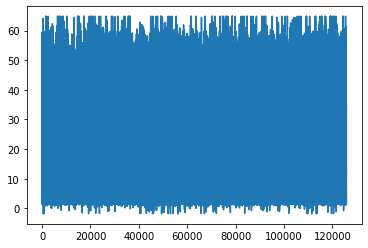

In [ ]:
plt.plot(df_train['breath_id'],df_train['pressure'])

In [ ]:
df = df_train[df_train['breath_id'] < 30].reset_index(drop=True)
df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
2075,2076,29,50,20,2.410626,4.954652,1,6.259305
2076,2077,29,50,20,2.442616,4.961355,1,6.329607
2077,2078,29,50,20,2.474634,4.967072,1,6.329607
2078,2079,29,50,20,2.506605,4.971936,1,6.399909


([<matplotlib.lines.Line2D at 0x7faf16df2450>],
 [<matplotlib.lines.Line2D at 0x7faf16df2d10>])

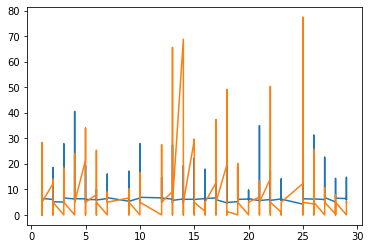

In [ ]:
plt.plot(df['breath_id'],df['pressure']),plt.plot(df['breath_id'],df['u_in'])

In [ ]:
def plot_sample(sample_id, df):
    df_breath = df[df['breath_id'] == sample_id]
    r, c  = df_breath[['R', 'C']].values[0]

    cols = ['u_in', 'u_out', 'pressure'] if 'pressure' in df.columns else ['u_in', 'u_out']
    
    plt.figure(figsize=(12, 4))
    for col in ['u_in', 'u_out', 'pressure']:
        plt.plot(df_breath['time_step'], df_breath[col], label=col)
        
    plt.legend()
    plt.title(f'Sample {sample_id} - R={r}, C={c}')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

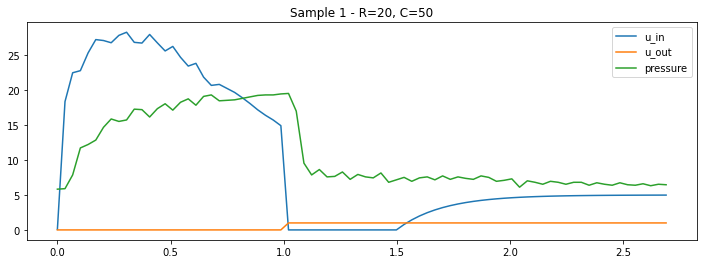

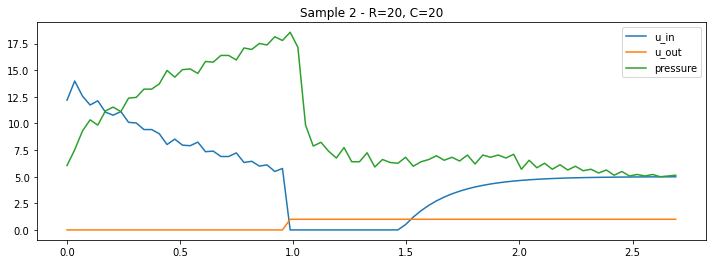

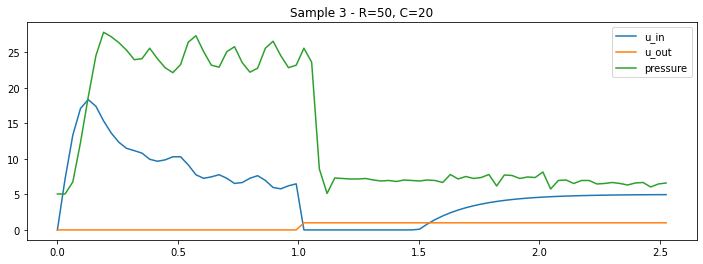

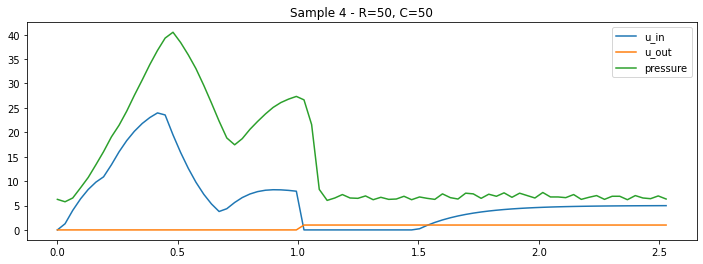

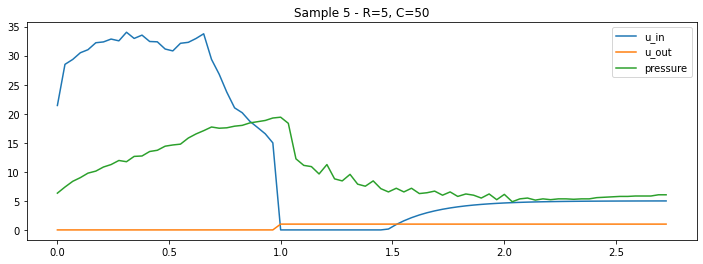

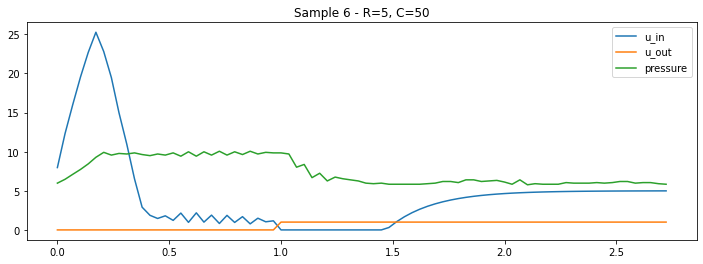

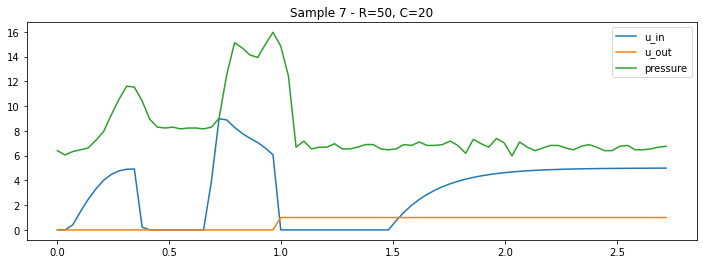

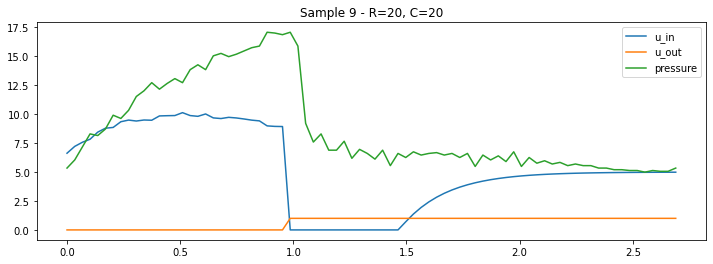

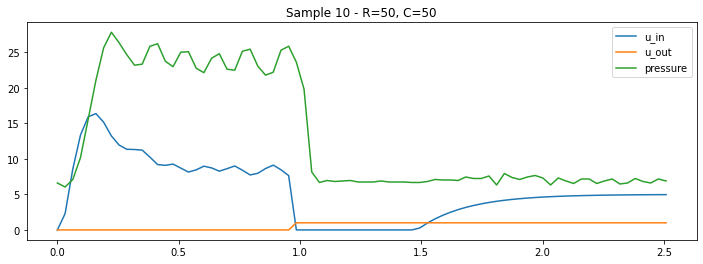

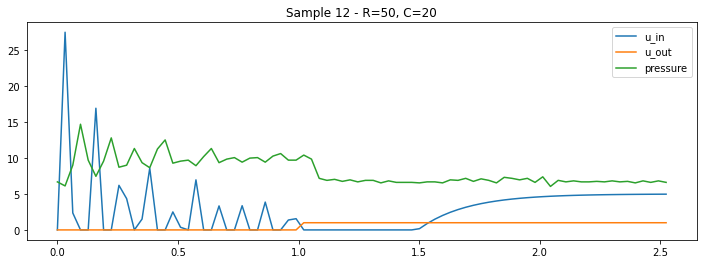

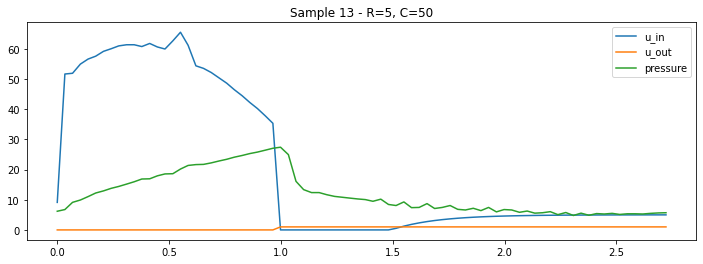

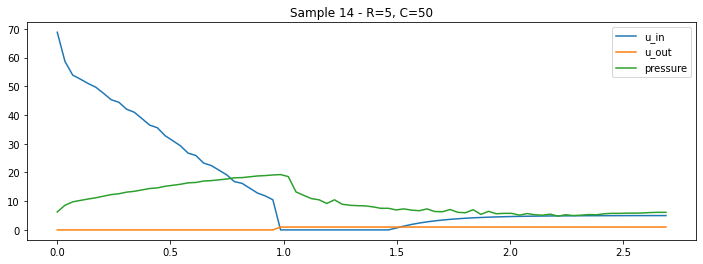

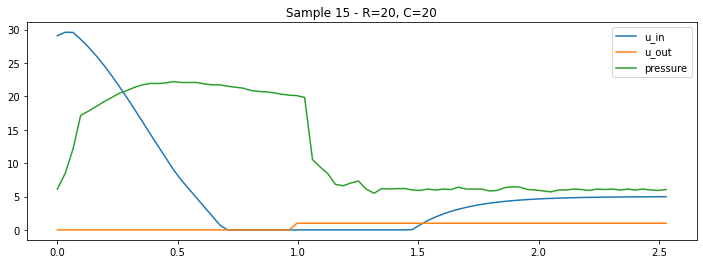

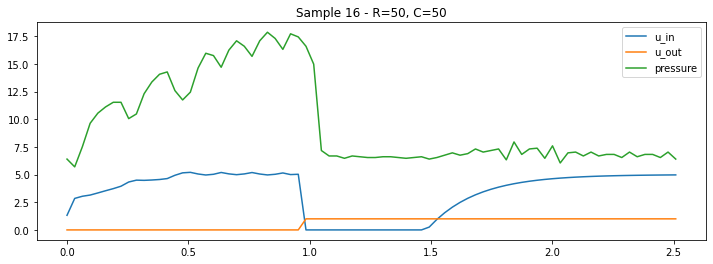

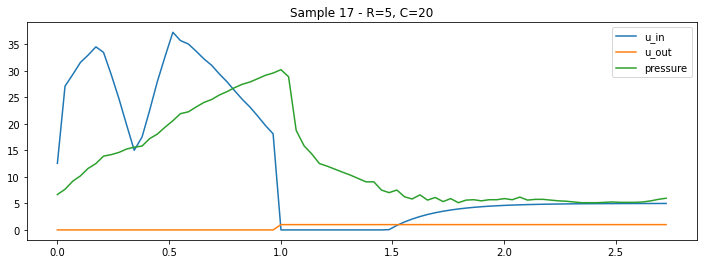

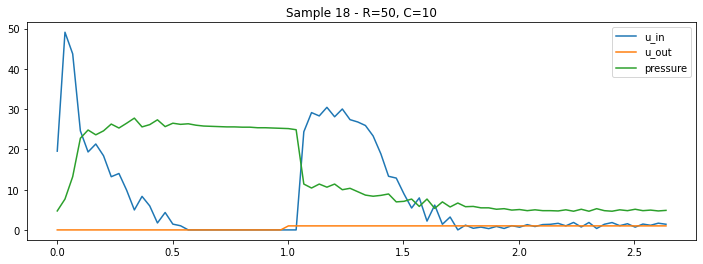

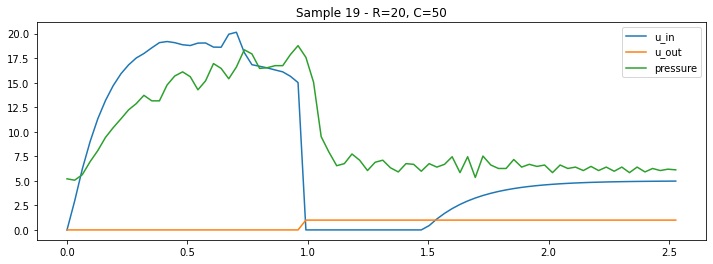

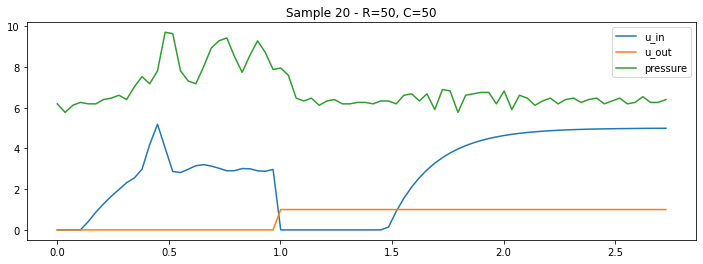

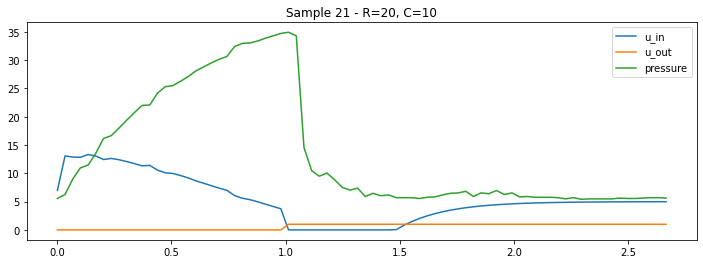

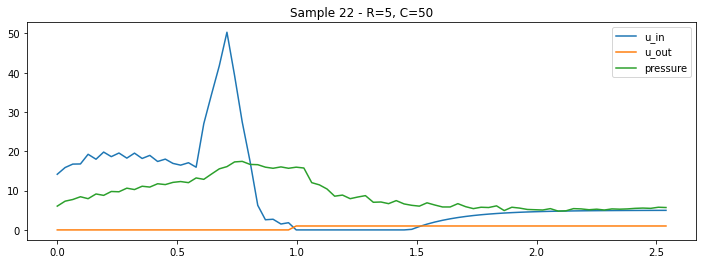

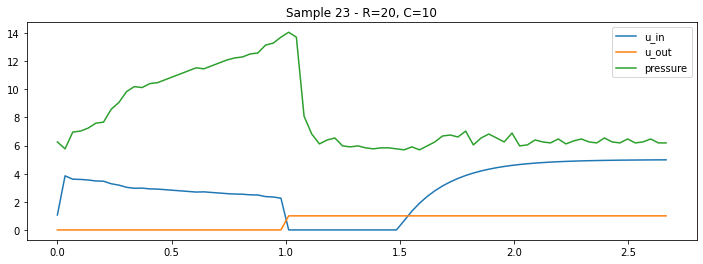

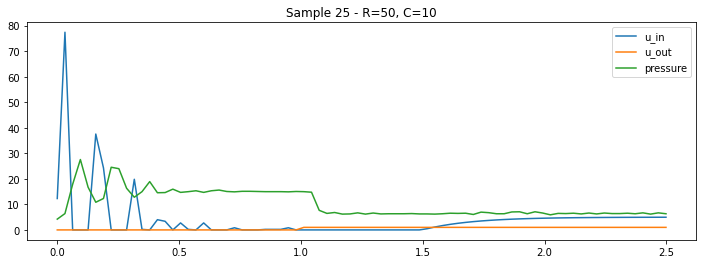

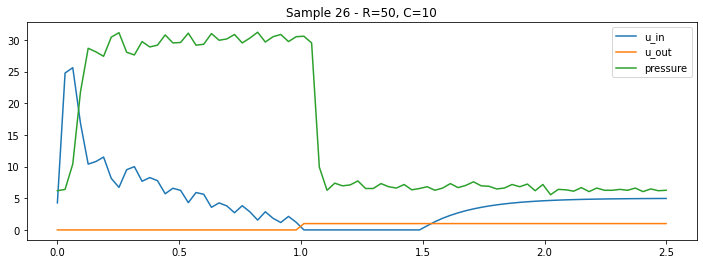

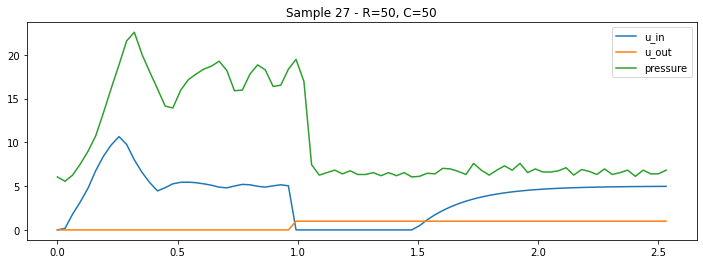

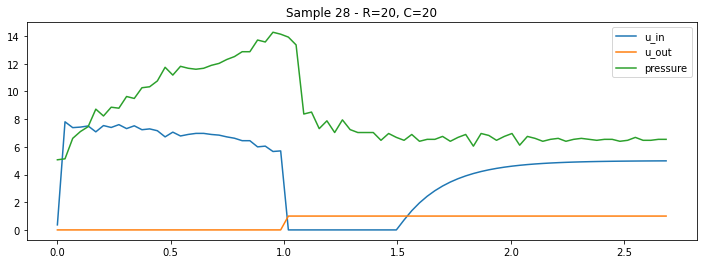

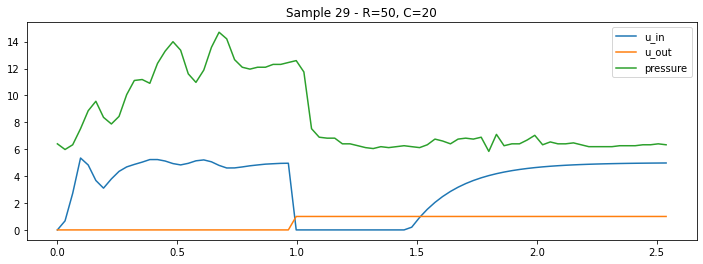

In [ ]:
#https://www.kaggle.com/code/theoviel/deep-learning-starter-simple-lstm
for i in df['breath_id'].unique():
    plot_sample(i, df_train)